## 2021 Spring "EE479: Scientific Computing & Data"

### Yong-Hoon Kim, KAIST Electrical Engineering

### Linge & Langtagen Ch.4.3.11:  Spring-mass system with sliding friction

#### Writer: Hyeonwoo Yeo
#### 2021. 04. 13

A body with mass $m$ is attached to a spring with stiffness $k$ while sliding on a plane surfcae. The body is also subject to a friction force $f(u')$ due to the contact between the body and the plane.

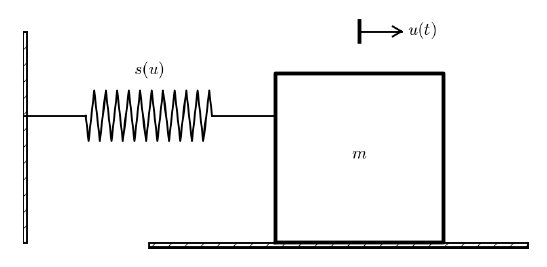


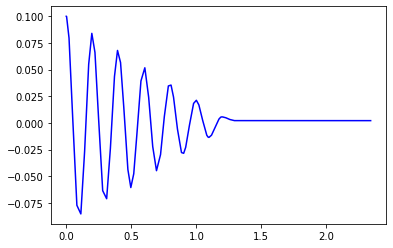

100000


In [2]:
from numpy import tanh, sign
import matplotlib.pyplot as plt
from scipy import integrate as inte
import time

def g(t,Y):
    g = 9.81
    mu = 0.4
    m = 1
    k = 1000
    
    u=Y[0]
    v=Y[1]
    dydt=v
    
    w = 3
    A = 0.5

    f = mu*m*g*sign(v)
    alpha = 60.0    
    #s = k/alpha*tanh(alpha*u)
    s = k*u
    F = 0
    
    dvdt=(1./m)*(F - f - s)
    return [dydt,dvdt]

max_iteration = 10**5
t_bound = 10
max_step = 0.1
U_0 = 0.1
V_0 = 0

solution = inte.RK45(g, 0, [U_0,V_0], t_bound, max_step) #vectorized=True
start_solution = time.time()
t_solution = []
y_solution = []
for i in range(max_iteration):
# get solution step state
    solution.step() #implemented function in scipy to collect data
    t_solution.append(solution.t)
    y_solution.append(solution.y[0])
    if solution.status == 'finished' :
        time_solution = time.time() - start_solution

        print(max(t_solution))
        break
        
index = int(len(y_solution)*100/100.)
plt.plot(t_solution, y_solution, 'b-')
plt.show()
print(len(t_solution))
#print("calculation time:", time_solution)
